# 주요 웹 개념
* WWW, HyperText, URL
* request / response
* 응답코드 : 200, 404, 500
* HTTP and HTTP Commands (GET, POST)
* HTTP 헤더
* 사용자 에이전트
* 쿠키
* HTML 태그: table, tr, td, div, a href
* XHR (XMLHttpRequest, =Ajax)

# 크롬 개발자 도구 (Chrome Developer Tools)

크롬에 기본 탑재된 웹 개발 및 디버깅 도구

* 우측 상단의 메뉴 > 도구 더 보기 > 개발자 도구 (F12 혹은 Ctrl+Shift+I, MacOS Cmd+Opt+I)
* 요소(Elements), 네트워크(Network), 소스(Sources), 타임라인(Timeline), 콘솔(Console) 등 기능
* 요소(Element) 탭: 웹 페이지 요소의 CSS와 HTML 검사

# 크롤링 주요 이슈

1. 단순 HTTP 요청: requests.get()
1. 요청에 데이터 실어 보내기: requests.post()
1. 응답 페이지 분석, 데이터 추출, 데이터 전처리
1. 헤더 지정: requests 에 헤더값 지정
1. 문자 인코딩 (UTF-8, EUC-KR)
1. 정규식
1. 로그인(인증): requests의 Session 객체 사용
1. IP-Ban: 프록시 서버, 프록시 경유하기
1. 동적으로 화면 혹은 데이터가 생성: Selenium 사용

# KOSPI_200

1. Naver
2. KRX

## 1. Naver

https://finance.naver.com/sise/sise_index.nhn?code=KPI200

편입종목 목록

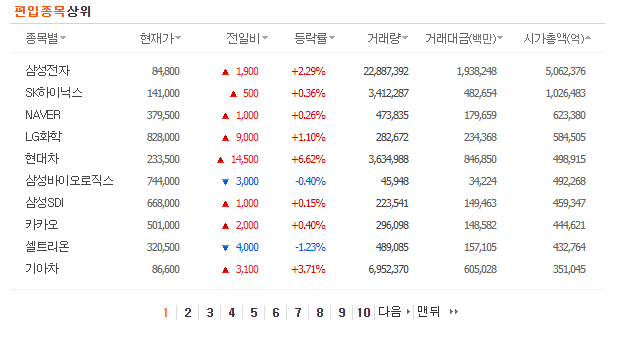

목록에서 페이지 주소는 

```
https://finance.naver.com/sise/entryJongmok.nhn?&page=2
```

chrome 인스펙터로 살펴보면,

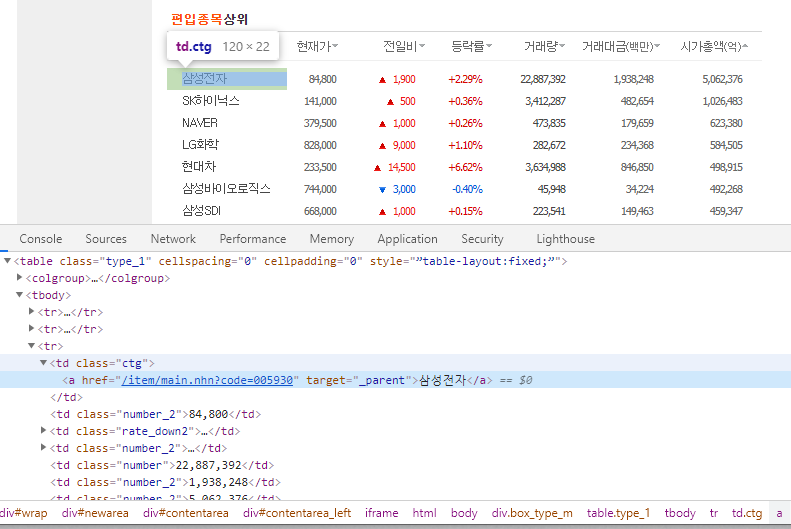

In [1]:
from bs4 import BeautifulSoup
import requests
import re
from pathlib import Path
import pandas as pd

baseurl = 'https://finance.naver.com/sise/entryJongmok.nhn?&page='

kosp200_path = Path('../kospi200.csv')

if kosp200_path.exists():
    try:
        kosp200_path.unlink()
    except OSError as e:
        print("Error: %s : %s" % (kosp200_path, e.strerror))    

kospi200 = []

for i in range(1, 22, 1):
    url = baseurl + str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    items = soup.find_all('td', {'class': 'ctg'})
    
    for item in items:
        txt = item.a.get('href')
        k = re.search('[\d]+', txt)
        if k:
            code = k.group()
            name = item.text
            data = code, name
            kospi200.append(data)
print(kospi200)

[('005930', '삼성전자'), ('000660', 'SK하이닉스'), ('035420', 'NAVER'), ('051910', 'LG화학'), ('005380', '현대차'), ('207940', '삼성바이오로직스'), ('006400', '삼성SDI'), ('035720', '카카오'), ('068270', '셀트리온'), ('000270', '기아차'), ('012330', '현대모비스'), ('005490', 'POSCO'), ('066570', 'LG전자'), ('051900', 'LG생활건강'), ('028260', '삼성물산'), ('017670', 'SK텔레콤'), ('105560', 'KB금융'), ('096770', 'SK이노베이션'), ('034730', 'SK'), ('036570', '엔씨소프트'), ('055550', '신한지주'), ('003550', 'LG'), ('032830', '삼성생명'), ('090430', '아모레퍼시픽'), ('015760', '한국전력'), ('018260', '삼성에스디에스'), ('009150', '삼성전기'), ('086790', '하나금융지주'), ('003670', '포스코케미칼'), ('033780', 'KT&G'), ('251270', '넷마블'), ('011170', '롯데케미칼'), ('018880', '한온시스템'), ('011200', 'HMM'), ('003490', '대한항공'), ('009830', '한화솔루션'), ('009540', '한국조선해양'), ('010950', 'S-Oil'), ('000810', '삼성화재'), ('352820', '빅히트'), ('326030', 'SK바이오팜'), ('034220', 'LG디스플레이'), ('011780', '금호석유'), ('010130', '고려아연'), ('316140', '우리금융지주'), ('030200', 'KT'), ('086280', '현대글로비스'), ('024110', '기업은행'), ('004020',

In [2]:
df = pd.DataFrame(kospi200, columns=['Code', 'Name'])
df

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,035420,NAVER
3,051910,LG화학
4,005380,현대차
...,...,...
196,007570,일양약품
197,145990,삼양사
198,005180,빙그레
199,009410,태영건설


In [3]:
df.to_csv(kosp200_path, index=False)